# Занятие 8. Другие библиотеки Python

## Sklearn

In [43]:
import pandas as pd

dataset = pd.read_csv("credit_data.csv", header=0, sep=';')

In [40]:
!head -3 credit_data.csv

In [44]:
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [45]:
labels = dataset['default payment next month']

In [47]:
dataset.drop(['default payment next month'], axis=1, inplace=True)
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000


In [48]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split(dataset, labels, test_size=0.25, random_state=42)

In [49]:
print len(train_X), len(test_X)

22500 7500


In [50]:
from sklearn.linear_model import LogisticRegression

predictive_model = LogisticRegression()
predictive_model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
predictions = predictive_model.predict(test_X)

In [52]:
print predictions

[0 0 0 ..., 0 0 0]


In [53]:
print type(predictions)

<type 'numpy.ndarray'>


In [56]:
print sum(predictions == test_y) / float(len(test_y))

0.783066666667


In [57]:
from sklearn.metrics import accuracy_score

print accuracy_score(predictions, test_y)

0.783066666667


In [58]:
print sum(predictions)

0


## Более сложный пример с sklearn

In [59]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import heapq

In [60]:
all_categories = fetch_20newsgroups().target_names
all_categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [61]:
categories = [
    'sci.electronics',
    'sci.space',
    'sci.med'
]
train_data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
test_data = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
count_vectorizer = CountVectorizer(min_df=5, ngram_range=(1, 2)) 

In [ ]:
dataset = count_vectorizer.fit_transform(train_data)

In [65]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score

In [66]:
from sklearn.pipeline import Pipeline

In [73]:
pipeline = Pipeline([("vectorizer", CountVectorizer(min_df=5, ngram_range=(1, 2))), ("algo", SVC(C=100000))])

In [74]:
pipeline.fit(train_data.data, train_data.target)

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
    ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [75]:
accuracy_score(pipeline.predict(test_data.data), test_data.target)

0.67878275570583257

## Pickle

In [76]:
import pickle

with open('model_file.pkl', 'wb') as model_dump_file:
    pickle.dump(predictive_model, model_dump_file)

In [77]:
with open('model_file.pkl', 'rb') as model_dump_file:
    loaded_model = pickle.load(model_dump_file)

print loaded_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


## Numpy

In [78]:
import numpy as np

In [79]:
x = [2, 3, 4, 6]
y = np.array(x)

In [80]:
print type(x), x
print type(y), y

<type 'list'> [2, 3, 4, 6]
<type 'numpy.ndarray'> [2 3 4 6]


In [81]:
print x[1:3]

[3, 4]


In [82]:
print y[1:3]

[3 4]


In [83]:
print x[[0, 2]]

TypeError: list indices must be integers, not list

In [84]:
print y[[0, 2]]

[2 4]


In [86]:
y > 3

array([False, False,  True,  True], dtype=bool)

In [85]:
print y[y > 3]

[4 6]


In [87]:
print x * 5

[2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6]


In [88]:
print y * 5

[10 15 20 30]


In [89]:
print x ** 2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [90]:
print y ** 2

[ 4  9 16 36]


In [91]:
matrix = [[1, 2, 4], [3, 1, 0]]
nd_array = np.array(matrix)

In [92]:
print matrix[1][2]

0


In [93]:
print nd_array[1, 2]

0


In [94]:
print nd_array[1][2]

0


In [108]:
print np.random.rand()

0.239527062201


In [107]:
print np.random.randn()

-0.0508019796217


In [109]:
print np.random.randn(4)

[-0.29719279  1.09402136 -0.73960417  0.33414992]


In [110]:
print np.random.randn(4, 5)

[[-0.25432201  0.29672006 -0.10278479  1.16432409  0.46870972]
 [ 1.3397736   0.40889038  0.97397976  1.1009218  -1.61305393]
 [ 0.76535822  0.38512044  0.64964442  0.05188734  1.23060044]
 [ 2.29578976  1.2129556  -1.4688682  -0.0902088  -1.07759425]]


In [111]:
print np.arange(0, 8, 0.1)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9]


In [112]:
print range(0, 8, 0.1)

TypeError: range() integer step argument expected, got float.

In [113]:
%timeit np.arange(0, 10000)
%timeit range(0, 10000)

The slowest run took 6.71 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.26 µs per loop
The slowest run took 4.24 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 289 µs per loop


## Задание по numpy
1. Напишите свой аналог np.linspace с использованием цикла и с использованием list comprehension. Сравните все три варианта по производительности
1. Сравните по производительности основные операции с массивами (array) numpy и с list


## SciPy

In [114]:
from scipy import optimize

In [115]:
def f(x):
    return (x[0] - 3.2) ** 2 + (x[1] - 0.1) ** 2 + 3

print f([3.2, 0.1])

3.0


In [116]:
x_min = optimize.minimize(f, [5, 5])
print x_min

      fun: 3.0000000000011435
 hess_inv: array([[ 0.94055055, -0.16183475],
       [-0.16183475,  0.55944947]])
      jac: array([ -2.05636024e-06,   5.36441803e-07])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([ 3.19999896,  0.10000026])


In [117]:
print x_min.x

[ 3.19999896  0.10000026]


In [118]:
from scipy import linalg

In [119]:
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

x = linalg.solve(a, b)
print x

[ 2. -2.  9.]


In [120]:
print np.dot(a, x)

[ 2.  4. -1.]


In [121]:
X = np.random.randn(4, 3)
U, D, V = linalg.svd(X)
print U.shape, D.shape, V.shape
print type(U), type(D), type(V)

(4, 4) (3,) (3, 3)
<type 'numpy.ndarray'> <type 'numpy.ndarray'> <type 'numpy.ndarray'>


## Задание по scipy
Попробуйте поменять метод оптимизации в примере решения оптимизационной задачи выше, и подобрать метод с наименьшим количеством вычислений функции. Начальное приближение оставьте тем же.

## Напоминание matplotlib

In [122]:
%matplotlib inline

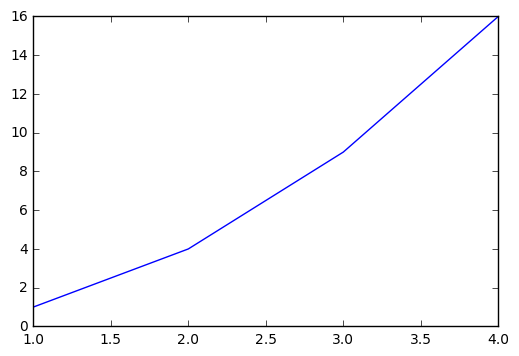

In [123]:
from matplotlib import pylab as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

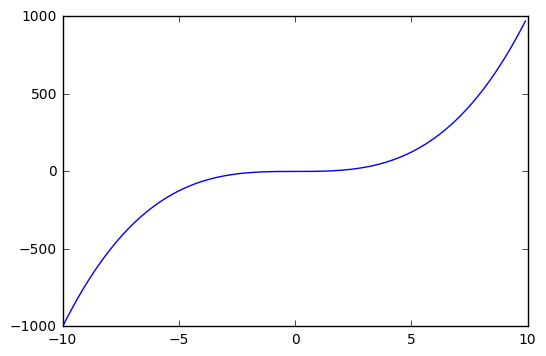

In [124]:
x = np.arange(-10, 10, 0.1)
y = x ** 3
plt.plot(x, y)
plt.show()

## Все вместе (numpy + scipy + matplotlib)

In [125]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [126]:
np.random.seed(42)

In [127]:
np.random.RandomState(42)

In [128]:
x = np.arange(0, 10, 2)
y = np.exp(-x/3.0) + np.random.randn(len(x)) * 0.05

print x[:5]
print y[:5]

[0 2 4 6 8]
[ 1.02483571  0.5065039   0.29598157  0.21148678  0.05777578]


In [131]:
f = interpolate.interp1d(x, y, kind='quadratic')
xnew = np.arange(0, 8, 0.1)
ynew = f(xnew)

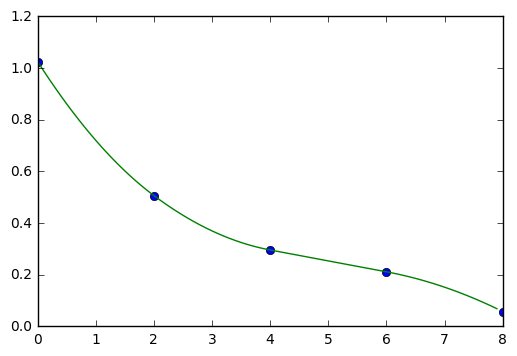

In [132]:
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

## Requests и beautiful soup

In [133]:
url = "http://lenta.ru/news/2015/11/11/aspirant/"

In [134]:
import requests

text = requests.get(url).text

In [135]:
print text

<!DOCTYPE html><html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"><head>
<title>Аспирант мехмата МГУ напал с самодельным копьем на женщину-охранника: Общество: Россия: Lenta.ru</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type" />
<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"66a8d51230","applicationID":"1241738","transactionName":"J19cQUoOWA0ERBoQXhRZUUYXElwOFg==","queueTime":0,"applicationTime":120,"agent":""}</script>
<script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQUGU1VRGwICUFBVBAk="};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){fun

In [136]:
print type(text)

<type 'unicode'>


In [137]:
from bs4 import BeautifulSoup

In [144]:
bs4_object = BeautifulSoup(text)

In [147]:
Beautifu

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"><head>
<title>Аспирант мехмата МГУ напал с самодельным копьем на женщину-охранника: Общество: Россия: Lenta.ru</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"66a8d51230","applicationID":"1241738","transactionName":"J19cQUoOWA0ERBoQXhRZUUYXElwOFg==","queueTime":0,"applicationTime":120,"agent":""}</script>
<script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQUGU1VRGwICUFBVBAk="};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){fun

In [148]:
?BeautifulSoup

In [139]:
bs4_object.text

u'\n\u0410\u0441\u043f\u0438\u0440\u0430\u043d\u0442 \u043c\u0435\u0445\u043c\u0430\u0442\u0430 \u041c\u0413\u0423 \u043d\u0430\u043f\u0430\u043b \u0441 \u0441\u0430\u043c\u043e\u0434\u0435\u043b\u044c\u043d\u044b\u043c \u043a\u043e\u043f\u044c\u0435\u043c \u043d\u0430 \u0436\u0435\u043d\u0449\u0438\u043d\u0443-\u043e\u0445\u0440\u0430\u043d\u043d\u0438\u043a\u0430: \u041e\u0431\u0449\u0435\u0441\u0442\u0432\u043e: \u0420\u043e\u0441\u0441\u0438\u044f: Lenta.ru\nwindow.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"66a8d51230","applicationID":"1241738","transactionName":"J19cQUoOWA0ERBoQXhRZUUYXElwOFg==","queueTime":0,"applicationTime":120,"agent":""}\n(window.NREUM||(NREUM={})).loader_config={xpid:"VQUGU1VRGwICUFBVBAk="};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("funct

In [140]:
print " ".join(bs4_object.text.split()[200:500])

r?t:t?s(t,c,i):i()}function n(n,r,o,i){if(!l.aborted||i){t&&t(n,r,o);for(var a=e(o),c=h(n),s=c.length,f=0;f<s;f++)c[f].apply(a,r);var d=u[w[n]];return d&&d.push([g,n,r,a]),a}}function p(t,e){y[t]=h(t).concat(e)}function h(t){return y[t]||[]}function m(t){return d[t]=d[t]||o(n)}function v(t,e){f(t,function(t,n){e=e||"feature",w[n]=e,e in u||(u[e]=[])})}var y={},w={},g={on:p,emit:n,get:m,listeners:h,context:e,buffer:v,abort:a,aborted:!1};return g}function i(){return new r}function a(){(u.api||u.feature)&&(l.aborted=!0,u=l.backlog={})}var c="nr@context",s=t("gos"),f=t(12),u={},d={},l=e.exports=o();l.backlog=u},{}],gos:[function(t,e,n){function r(t,e,n){if(o.call(t,e))return t[e];var r=n();if(Object.defineProperty&&Object.keys)try{return Object.defineProperty(t,e,{value:r,writable:!0,enumerable:!1}),r}catch(i){}return t[e]=r,r}var o=Object.prototype.hasOwnProperty;e.exports=r},{}],handle:[function(t,e,n){function r(t,e,n,r){o.buffer([t],r),o.emit(t,e,n)}var o=t("ee").get("handle");e.export

In [141]:
for i, word in enumerate(bs4_object.text.split()):
    if u"копье" in word:
        print i

6
319
333
1743


In [143]:
print bs4_object.find(itemprop="articleBody").text

Аспирант МГУ жестоко избил самодельным копьем женщину-охранника студенческого общежития. Об этом сообщает РИА Новости со ссылкой на представителя столичного главка МВД.«Сотрудниками полиции был задержан 24-летний аспирант механико-математического факультета МГУ, который по неустановленным причинам нанес телесные повреждения 62-летней женщине-охраннику», — рассказал Андрей Галиакберов. По его словам, молодой человек использовал в качестве оружия металлическую палку с прикрепленным к ней ножом. Женщину доставили в больницу с черепно-мозговой травмой и переломом руки. Мотивы действий аспиранта выясняются.По словам очевидцев, молодой человек был невменяем и кричал, сообщает LifeNews. Женщина-охранник попыталась его усмирить, она же вызвала полицию.Нападавший задержан и направлен в психиатрическую больницу для оказания экстренной помощи. Возбуждено уголовное дело по статье «Умышленное причинение тяжкого вреда здоровью». Максимальное наказание по ней составляет десять лет лишения свободы.


# Рекомендации других библиотек

1. xml
1. json
1. re (регулярные выражения)

## Вопросы в конце занятия

1. Работа с оборудованием
1. Работа с БД (sql запросы, mysql, oracle)
1. Arduino
1. GUI
1. Автоматизация действий в браузере
1. Веб-разработка